In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

visa_df = pd.read_csv('C:\\Users\\swaga\\OneDrive\\Documents\\datafiles\\Visadataset.csv')
cat = visa_df.select_dtypes(include='object').columns
num = visa_df.select_dtypes(exclude='object').columns

- we have two sacle

    - 1. z-score
    - 2. MinMaxscore
    
    
<img class="XqHOTb IGEbUc" alt="Z = \frac{x - \mu}{\sigma}" src="https://www.gstatic.com/education/formulas2/553212783/en/z_score.svg" role="img" data-csiid="ZE0baJq7MfrE4-EPw_OFwQs_14" data-atf="0">


In [2]:
# step-1 : x = prevailaing wage data
# step-2 : Calculate mean : u
# step-3 : Calculate std : sigma
# step-4 : Nr = step1-step2
# step-5 : z = step4/step3
# step-6 : Create a new column pwage_z
# step-7 : Draw the distribution plot for both prevailaing_wage and pwage-z

# observation : Even though values are modified data distribution kids


In [12]:
visa_df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status', 'p_wage_z'],
      dtype='object')

In [3]:
# step-1
wage_data= visa_df['prevailing_wage']
wage_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [6]:
# step-2
u = wage_data.mean()
u

74455.81459209221

In [7]:
# step-3
sd = np.std(wage_data)
sd

52814.90589711402

In [8]:
# step-4
Nr = wage_data-u
Nr

0        -73863.611692
1          8969.835408
2         48541.045408
3          8978.215408
4         75451.575408
             ...      
25475      2636.755408
25476    204718.975408
25477     71843.035408
25478     11698.955408
25479     -3578.904592
Name: prevailing_wage, Length: 25480, dtype: float64

In [9]:
# step-5
z = Nr/sd
z

0       -1.398537
1        0.169835
2        0.919079
3        0.169994
4        1.428604
           ...   
25475    0.049924
25476    3.876159
25477    1.360280
25478    0.221509
25479   -0.067763
Name: prevailing_wage, Length: 25480, dtype: float64

In [10]:
# step-6
visa_df['p_wage_z'] = Nr/sd

In [13]:
visa_df[['prevailing_wage','p_wage_z']]

,prevailing_wage,p_wage_z
0,592.2029,-1.398537
1,83425.6500,0.169835
2,122996.8600,0.919079
3,83434.0300,0.169994
4,149907.3900,1.428604
...,...,...
25475,77092.5700,0.049924
25476,279174.7900,3.876159
25477,146298.8500,1.360280
25478,86154.7700,0.221509


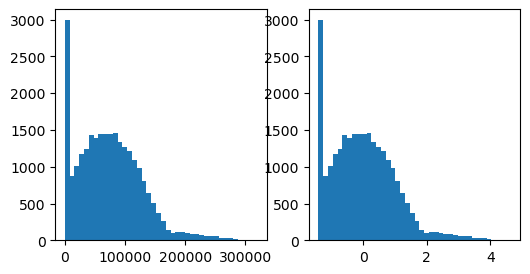

In [16]:
# step-7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(1,2,2).hist(visa_df['p_wage_z'],bins=40)
plt.show()

**standard scalar**

- sklearn

    - prepocessing
    
        - standardscalar

In [20]:
import sklearn

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
visa_df['p_wage_ss'] = ss.fit_transform(visa_df[['prevailing_wage']])

In [26]:
visa_df[['prevailing_wage','p_wage_z','p_wage_ss']]

,prevailing_wage,p_wage_z,p_wage_ss
0,592.2029,-1.398537,-1.398537
1,83425.6500,0.169835,0.169835
2,122996.8600,0.919079,0.919079
3,83434.0300,0.169994,0.169994
4,149907.3900,1.428604,1.428604
...,...,...,...
25475,77092.5700,0.049924,0.049924
25476,279174.7900,3.876159,3.876159
25477,146298.8500,1.360280,1.360280
25478,86154.7700,0.221509,0.221509


In [33]:
x = visa_df['prevailing_wage']
x_min = round(np.min(wage_data),2)
x_max = round(np.max(wage_data),2)
Nr = x-x_min
Dr = x_max-x_min
wage_norm = Nr/Dr
visa_df['wage_norm'] = Nr/Dr
visa_df[['prevailing_wage','wage_norm']]

,prevailing_wage,wage_norm
0,592.2029,0.001849
1,83425.6500,0.261345
2,122996.8600,0.385312
3,83434.0300,0.261371
4,149907.3900,0.469616
...,...,...
25475,77092.5700,0.241505
25476,279174.7900,0.874579
25477,146298.8500,0.458311
25478,86154.7700,0.269895


In [37]:
visa_df[['prevailing_wage','wage_norm']].idxmax()

prevailing_wage    21077
wage_norm          21077
dtype: int64

In [38]:
visa_df[['prevailing_wage','wage_norm']].idxmin()

prevailing_wage    20575
wage_norm          20575
dtype: int64

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
mms = MinMaxScaler()
visa_df['wage_norm_2'] = mms.fit_transform(visa_df[['prevailing_wage']])

In [40]:
visa_df[['prevailing_wage','wage_norm','wage_norm_2']]

,prevailing_wage,wage_norm,wage_norm_2
0,592.2029,0.001849,0.001849
1,83425.6500,0.261345,0.261345
2,122996.8600,0.385312,0.385312
3,83434.0300,0.261371,0.261371
4,149907.3900,0.469616,0.469616
...,...,...,...
25475,77092.5700,0.241505,0.241505
25476,279174.7900,0.874579,0.874579
25477,146298.8500,0.458311,0.458311
25478,86154.7700,0.269895,0.269895
